In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
im=cv2.imread("cap.jpg")
print(im.shape)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape

(419, 798, 3)


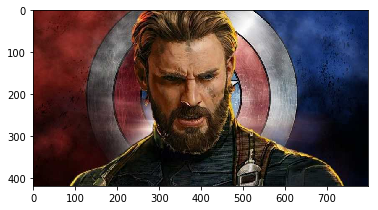

In [51]:
plt.imshow(im)
plt.show()

In [52]:
#Flatten each channel of the image
all_pixels=im.reshape((419*798,3))
print(all_pixels.shape)

(334362, 3)


In [53]:
from sklearn.cluster import KMeans

In [54]:
dominant_colors=6
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
centers=km.cluster_centers_

In [56]:
centers=np.array(centers,dtype='uint8')

In [57]:
print(centers)

[[ 24  16  17]
 [178 142 121]
 [ 91  40  30]
 [125  94  83]
 [ 32  55 109]
 [201 196 195]]


# Plot what colors are these? 

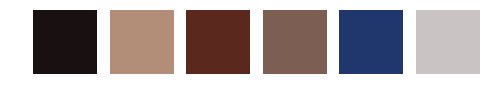

In [58]:
i=1

colors=[]
plt.figure(0,figsize=(8,2))

for each_color in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    
    i+=1
    colors.append(each_color)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    
    a[:,:,:]=each_color
    
    plt.imshow(a)

plt.show()
    
    

# Segmenting our image 

In [59]:
new_img=np.zeros((419*798,3),dtype='uint8')
print(new_img.shape)

(334362, 3)


In [60]:
colors

[array([24, 16, 17], dtype=uint8),
 array([178, 142, 121], dtype=uint8),
 array([91, 40, 30], dtype=uint8),
 array([125,  94,  83], dtype=uint8),
 array([ 32,  55, 109], dtype=uint8),
 array([201, 196, 195], dtype=uint8)]

In [61]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

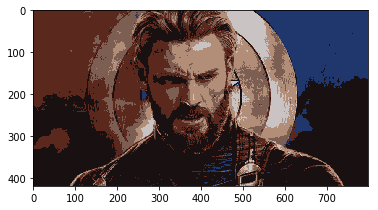

In [62]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()